In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf 
import pandas as pd
from sklearn.model_selection import train_test_split 

/home/ppxct2/anaconda3/envs/keras_demo/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ppxct2/anaconda3/envs/keras_demo/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ppxct2/anaconda3/envs/keras_demo/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ppxct2/anaconda3/envs/keras_

In [2]:
# if multiple GPUs, only use one of them 
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# avoid hogging all the GPU memory
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [3]:
from tensorflow import keras 
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import RMSprop

In [4]:
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = 14

In [25]:
#Fits images for testing 
#High SNR images 
good_imgs = np.load('/home/ppxct2/Documents/CANDELS/good_imgs.npy')
#corresponding conc values 
good_conc = np.load('/home/ppxct2/Documents/CANDELS/good_conc.npy')
good_norm = np.load('/home/ppxct2/Documents/CANDELS/good_norm.npy')

In [30]:
def crop_images(image_array):
    even_crop = []
    for i in range(len(image_array)):
        image = image_array[i]
        crop = image[34:66,34:66]
        even_crop.append(crop)
    return(np.array(even_crop))

even_crop = crop_images(good_norm)

In [31]:

#split data into training samples
#x_train = cropped_images 
x_train = even_crop
y_train = good_conc

# Splitting training and validation 80% 20% - using random_state to ensure split the same way every time to avoid overfitting
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
# Splitting testing and vaildation data 10% each 
x_test,x_val, y_test, y_val = train_test_split(x_val, y_val, test_size = 0.5, random_state = 42)


In [153]:
new_train = np.load('/home/ppxct2/Documents/CANDELS/new_train.npy')
new_vals = np.load('/home/ppxct2/Documents/CANDELS/new_vals.npy')
#Loading the data 
x_train = np.load('/home/ppxct2/Documents/CANDELS/x_train_data.npy')
y_train = np.load('/home/ppxct2/Documents/CANDELS/y_train_data.npy')
x_test = np.load('/home/ppxct2/Documents/CANDELS/x_test_data.npy')
y_test = np.load('/home/ppxct2/Documents/CANDELS/y_test_data.npy')
x_val = np.load('/home/ppxct2/Documents/CANDELS/x_val_data.npy')
y_val = np.load('/home/ppxct2/Documents/CANDELS/y_val_data.npy')

augmented_data = np.load('/home/ppxct2/Documents/CANDELS/augmented_data.npy')
augmented_vals = np.load('/home/ppxct2/Documents/CANDELS/augmented_vals.npy')


In [139]:
#x_train = new_train
#y_train = new_vals

#x_train=augmented_data
#y_train = augmented_vals

from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

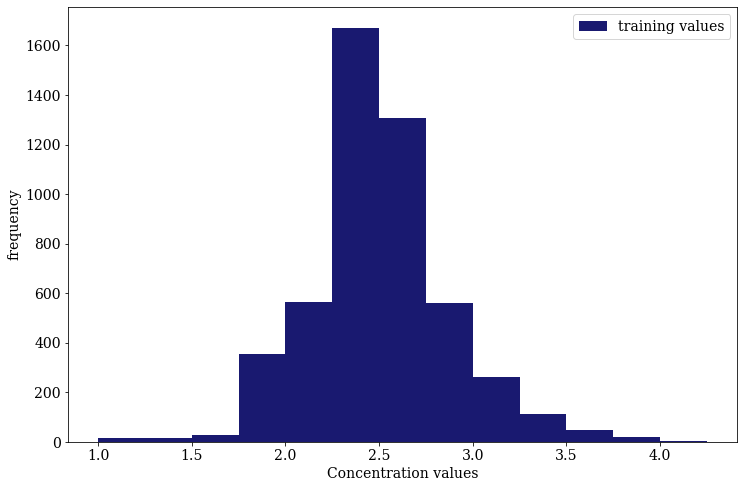

In [32]:
xbins = np.arange(1,4.5,0.25)
plt.hist(y_train, color = 'midnightblue', bins = xbins, alpha = 1, label = 'training values')
plt.legend()
plt.xlabel('Concentration values')
plt.ylabel('frequency')
plt.show()

In [100]:
'''
index = np.where((y_train < 2.25)  +(y_train > 2.75))
low_conc_vals = y_train[index]
low_conc_imgs = x_train[index]

#Rotating all images clockwise 90 degrees 3 times - only for training data 
rotated_CW = low_conc_imgs.swapaxes(-2,-1)[...,::-1]
rotated_CW_2 = rotated_CW.swapaxes(-2,-1)[...,::-1]
rotated_CW_3 = rotated_CW_2.swapaxes(-2,-1)[...,::-1]
'''

In [101]:
'''
augmented_data = np.concatenate((x_train, rotated_CW, rotated_CW_2), axis = 0)
augmented_vals = np.concatenate((y_train, low_conc_vals, low_conc_vals), axis = 0)
print(low_conc_imgs.shape)
'''

(1978, 31, 31)


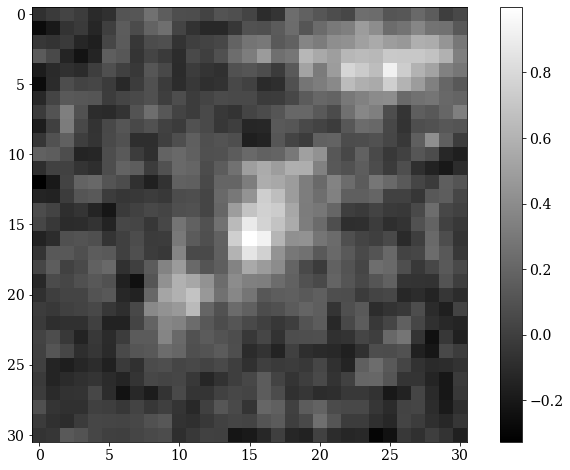

In [28]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('/home/ppxct2/Documents/CANDELS/GOODSS_opt/img_622.fits')
image_data = fits.getdata(image_file, ext=0)
crop = image_data[35:66, 35:66]
norm = crop/np.max(crop)
plt.figure()
plt.imshow(norm, cmap='gray')
plt.colorbar()
plt.show()
plt.close()

In [103]:
'''
#Data augmentation
#using rotated images for training 
x_train = augmented_data
y_train = augmented_vals 
#shuffling data in unison so that the machine does not learn to predict the rotations 
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)
'''

class =  2.598


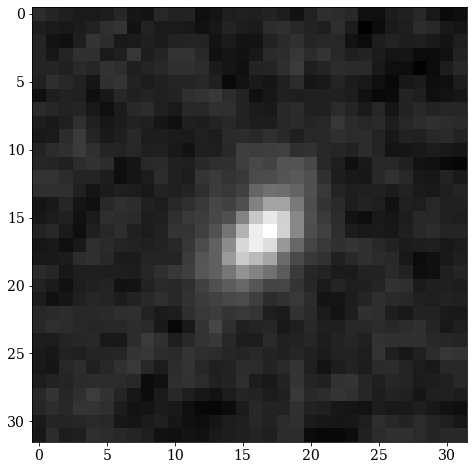

In [33]:
#taking a look at some data 
plt.figure()
i = 37
plt.imshow(x_train[i], cmap = 'gray')
print('class = ', y_train[i])

In [34]:
print(x_train.shape[0], 'Training samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')

4959 Training samples
620 test samples
620 validation samples


In [35]:
num_classes = 1 # only want one value out - asymmetry or concentration

In [36]:
#Modules needed 
def histplot(history):
    hist = pd.DataFrame(history.history)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    hist.plot(y=['loss', 'val_loss'], ax=ax1)
    min_loss = hist['val_loss'].min()
    ax1.hlines(min_loss, 0, len(hist), linestyle='dotted',
               label='min(val_loss) = {:.3f}'.format(min_loss))
    ax1.legend(loc='upper right')
    hist.plot(y=['mean_absolute_error', 'val_mean_absolute_error'], ax=ax2)
    min_acc = hist['val_mean_absolute_error'].min()
    ax2.hlines(min_acc, 0, len(hist), linestyle='dotted',
               label='min(val_mean_absolute_error) = {:.3f}'.format(min_acc))
    ax2.legend(loc='upper right')

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


In [37]:
# Reshaping data 
x_train = np.expand_dims(x_train, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)
x_val = np.expand_dims(x_val, axis = 3)


In [38]:
print(x_train.shape)
print(x_train.dtype)
print(np.max(x_train))

(4959, 32, 32, 1)
float64
1.0


In [39]:
# a fairly small network for speed
### CNN ### 
cnnmodel = Sequential()
cnnmodel.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
cnnmodel.add(AveragePooling2D((2, 2)))
cnnmodel.add(Conv2D(32, (3, 3), activation='relu',activity_regularizer=regularizers.l2(0.01)))
cnnmodel.add(AveragePooling2D((2, 2)))
#cnnmodel.add(Conv2D(16, (3, 3), activation='relu',activity_regularizer=regularizers.l2(0.01)))
#cnnmodel.add(AveragePooling2D((2, 2)))
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(16, activation = 'relu'))
cnnmodel.add(Dense(num_classes, activation='linear'))

In [40]:
#define batch size and number of epochs - compile the model
batch_size = 128
epochs = 100

cnnmodel.compile(loss= root_mean_squared_error ,optimizer = RMSprop(), metrics=['mean_absolute_error'])
cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)               

In [129]:
# save weights for reinitialising below
cnnmodel.save_weights('/tmp/cnnmodel_init_weights.tf')

Train on 4959 samples, validate on 620 samples
Epoch 1/300
4959/4959 [==============================] - 2s 313us/sample - loss: 0.9477 - mean_absolute_error: 0.6820 - val_loss: 0.4943 - val_mean_absolute_error: 0.2766
Epoch 2/300
4959/4959 [==============================] - 1s 237us/sample - loss: 0.5249 - mean_absolute_error: 0.3270 - val_loss: 0.4676 - val_mean_absolute_error: 0.2930
Epoch 3/300
4959/4959 [==============================] - 1s 242us/sample - loss: 0.4906 - mean_absolute_error: 0.3160 - val_loss: 0.4642 - val_mean_absolute_error: 0.3074
Epoch 4/300
4959/4959 [==============================] - 1s 241us/sample - loss: 0.4690 - mean_absolute_error: 0.3079 - val_loss: 0.4728 - val_mean_absolute_error: 0.3285
Epoch 5/300
4959/4959 [==============================] - 1s 243us/sample - loss: 0.4582 - mean_absolute_error: 0.3069 - val_loss: 0.4609 - val_mean_absolute_error: 0.3263
Epoch 6/300
4959/4959 [==============================] - 1s 238us/sample - loss: 0.4463 - mean_abs

4959/4959 [==============================] - 1s 244us/sample - loss: 0.3560 - mean_absolute_error: 0.2588 - val_loss: 0.3369 - val_mean_absolute_error: 0.2456
Epoch 49/300
4959/4959 [==============================] - 1s 283us/sample - loss: 0.3639 - mean_absolute_error: 0.2679 - val_loss: 0.3590 - val_mean_absolute_error: 0.2727
Epoch 50/300
4959/4959 [==============================] - 2s 311us/sample - loss: 0.3567 - mean_absolute_error: 0.2618 - val_loss: 0.3381 - val_mean_absolute_error: 0.2420
Epoch 51/300
4959/4959 [==============================] - 1s 292us/sample - loss: 0.3579 - mean_absolute_error: 0.2604 - val_loss: 0.3693 - val_mean_absolute_error: 0.2854
Epoch 52/300
4959/4959 [==============================] - 1s 228us/sample - loss: 0.3602 - mean_absolute_error: 0.2630 - val_loss: 0.3396 - val_mean_absolute_error: 0.2425
Epoch 53/300
4959/4959 [==============================] - 1s 262us/sample - loss: 0.3634 - mean_absolute_error: 0.2656 - val_loss: 0.3432 - val_mean_abso

Epoch 96/300
4959/4959 [==============================] - 1s 226us/sample - loss: 0.3438 - mean_absolute_error: 0.2498 - val_loss: 0.3848 - val_mean_absolute_error: 0.3011
Epoch 97/300
4959/4959 [==============================] - 1s 222us/sample - loss: 0.3458 - mean_absolute_error: 0.2538 - val_loss: 0.3421 - val_mean_absolute_error: 0.2463
Epoch 98/300
4959/4959 [==============================] - 1s 229us/sample - loss: 0.3437 - mean_absolute_error: 0.2508 - val_loss: 0.3466 - val_mean_absolute_error: 0.2589
Epoch 99/300
4959/4959 [==============================] - 1s 226us/sample - loss: 0.3444 - mean_absolute_error: 0.2519 - val_loss: 0.3301 - val_mean_absolute_error: 0.2362
Epoch 100/300
4959/4959 [==============================] - 1s 228us/sample - loss: 0.3435 - mean_absolute_error: 0.2494 - val_loss: 0.3326 - val_mean_absolute_error: 0.2413
Epoch 101/300
4959/4959 [==============================] - 1s 225us/sample - loss: 0.3435 - mean_absolute_error: 0.2503 - val_loss: 0.3471 

4959/4959 [==============================] - 1s 229us/sample - loss: 0.3271 - mean_absolute_error: 0.2372 - val_loss: 0.3527 - val_mean_absolute_error: 0.2636
Epoch 144/300
4959/4959 [==============================] - 1s 228us/sample - loss: 0.3294 - mean_absolute_error: 0.2400 - val_loss: 0.3471 - val_mean_absolute_error: 0.2583
Epoch 145/300
4959/4959 [==============================] - 1s 226us/sample - loss: 0.3287 - mean_absolute_error: 0.2381 - val_loss: 0.3331 - val_mean_absolute_error: 0.2385
Epoch 146/300
4959/4959 [==============================] - 1s 223us/sample - loss: 0.3263 - mean_absolute_error: 0.2370 - val_loss: 0.3663 - val_mean_absolute_error: 0.2789
Epoch 147/300
4959/4959 [==============================] - 1s 224us/sample - loss: 0.3228 - mean_absolute_error: 0.2325 - val_loss: 0.3686 - val_mean_absolute_error: 0.2738
Epoch 148/300
4959/4959 [==============================] - 1s 228us/sample - loss: 0.3246 - mean_absolute_error: 0.2357 - val_loss: 0.3321 - val_mean

4959/4959 [==============================] - 1s 290us/sample - loss: 0.3067 - mean_absolute_error: 0.2227 - val_loss: 0.3317 - val_mean_absolute_error: 0.2426
Epoch 191/300
4959/4959 [==============================] - 1s 246us/sample - loss: 0.3082 - mean_absolute_error: 0.2225 - val_loss: 0.3393 - val_mean_absolute_error: 0.2507
Epoch 192/300
4959/4959 [==============================] - 1s 239us/sample - loss: 0.3072 - mean_absolute_error: 0.2210 - val_loss: 0.3332 - val_mean_absolute_error: 0.2430
Epoch 193/300
4959/4959 [==============================] - 1s 245us/sample - loss: 0.3030 - mean_absolute_error: 0.2175 - val_loss: 0.3379 - val_mean_absolute_error: 0.2475
Epoch 194/300
4959/4959 [==============================] - 1s 238us/sample - loss: 0.3038 - mean_absolute_error: 0.2212 - val_loss: 0.3415 - val_mean_absolute_error: 0.2519
Epoch 195/300
4959/4959 [==============================] - 1s 246us/sample - loss: 0.3038 - mean_absolute_error: 0.2181 - val_loss: 0.3343 - val_mean

4959/4959 [==============================] - 2s 430us/sample - loss: 0.2848 - mean_absolute_error: 0.2036 - val_loss: 0.3298 - val_mean_absolute_error: 0.2424
Epoch 238/300
4959/4959 [==============================] - 2s 437us/sample - loss: 0.2861 - mean_absolute_error: 0.2064 - val_loss: 0.3312 - val_mean_absolute_error: 0.2403
Epoch 239/300
4959/4959 [==============================] - 2s 393us/sample - loss: 0.2865 - mean_absolute_error: 0.2052 - val_loss: 0.3299 - val_mean_absolute_error: 0.2396
Epoch 240/300
4959/4959 [==============================] - 2s 438us/sample - loss: 0.2817 - mean_absolute_error: 0.2021 - val_loss: 0.3307 - val_mean_absolute_error: 0.2416
Epoch 241/300
4959/4959 [==============================] - 2s 443us/sample - loss: 0.2835 - mean_absolute_error: 0.2038 - val_loss: 0.3363 - val_mean_absolute_error: 0.2447
Epoch 242/300
4959/4959 [==============================] - 2s 429us/sample - loss: 0.2845 - mean_absolute_error: 0.2048 - val_loss: 0.3270 - val_mean

4959/4959 [==============================] - 2s 474us/sample - loss: 0.2664 - mean_absolute_error: 0.1900 - val_loss: 0.3265 - val_mean_absolute_error: 0.2384
Epoch 285/300
4959/4959 [==============================] - 2s 462us/sample - loss: 0.2662 - mean_absolute_error: 0.1906 - val_loss: 0.3346 - val_mean_absolute_error: 0.2441
Epoch 286/300
4959/4959 [==============================] - 2s 442us/sample - loss: 0.2661 - mean_absolute_error: 0.1898 - val_loss: 0.3358 - val_mean_absolute_error: 0.2457
Epoch 287/300
4959/4959 [==============================] - 2s 429us/sample - loss: 0.2649 - mean_absolute_error: 0.1888 - val_loss: 0.3283 - val_mean_absolute_error: 0.2408
Epoch 288/300
4959/4959 [==============================] - 2s 431us/sample - loss: 0.2651 - mean_absolute_error: 0.1894 - val_loss: 0.3395 - val_mean_absolute_error: 0.2534
Epoch 289/300
4959/4959 [==============================] - 2s 441us/sample - loss: 0.2651 - mean_absolute_error: 0.1911 - val_loss: 0.3319 - val_mean

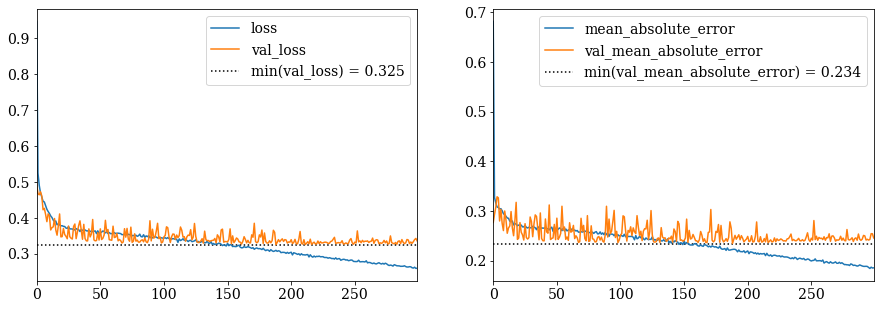

In [41]:
# cnnmodel.load_weights('/tmp/cnnmodel_init_weights.tf')
#trial 16+32 Dropout Dense 16 - using non stratified images
history = cnnmodel.fit(x_train, y_train,batch_size=batch_size, epochs=3*epochs,verbose=1,validation_data=(x_test, y_test))
histplot(history)
#plt.savefig('/home/ppxct2/Documents/CANDELS/MAE_RMSE_CONC.png')

Train on 19836 samples, validate on 620 samples
Epoch 1/300
19836/19836 [==============================] - 4s 206us/sample - loss: 0.5774 - mean_absolute_error: 0.4647 - val_loss: 0.4307 - val_mean_absolute_error: 0.3189
Epoch 2/300
19836/19836 [==============================] - 3s 170us/sample - loss: 0.4449 - mean_absolute_error: 0.3473 - val_loss: 0.3948 - val_mean_absolute_error: 0.2838
Epoch 3/300
19836/19836 [==============================] - 3s 159us/sample - loss: 0.4239 - mean_absolute_error: 0.3298 - val_loss: 0.4977 - val_mean_absolute_error: 0.3966
Epoch 4/300
19836/19836 [==============================] - 3s 156us/sample - loss: 0.4080 - mean_absolute_error: 0.3151 - val_loss: 0.3553 - val_mean_absolute_error: 0.2548
Epoch 5/300
19836/19836 [==============================] - 3s 167us/sample - loss: 0.3935 - mean_absolute_error: 0.3035 - val_loss: 0.3890 - val_mean_absolute_error: 0.2865
Epoch 6/300
19836/19836 [==============================] - 4s 178us/sample - loss: 0.38

Epoch 48/300
19836/19836 [==============================] - 3s 165us/sample - loss: 0.3079 - mean_absolute_error: 0.2241 - val_loss: 0.3260 - val_mean_absolute_error: 0.2317
Epoch 49/300
19836/19836 [==============================] - 4s 185us/sample - loss: 0.3077 - mean_absolute_error: 0.2240 - val_loss: 0.3212 - val_mean_absolute_error: 0.2299
Epoch 50/300
19836/19836 [==============================] - 3s 137us/sample - loss: 0.3067 - mean_absolute_error: 0.2231 - val_loss: 0.3283 - val_mean_absolute_error: 0.2383
Epoch 51/300
19836/19836 [==============================] - 3s 131us/sample - loss: 0.3074 - mean_absolute_error: 0.2230 - val_loss: 0.3223 - val_mean_absolute_error: 0.2304
Epoch 52/300
19836/19836 [==============================] - 3s 128us/sample - loss: 0.3074 - mean_absolute_error: 0.2232 - val_loss: 0.3351 - val_mean_absolute_error: 0.2395
Epoch 53/300
19836/19836 [==============================] - 3s 143us/sample - loss: 0.3062 - mean_absolute_error: 0.2233 - val_los

Epoch 142/300
19836/19836 [==============================] - 3s 127us/sample - loss: 0.2823 - mean_absolute_error: 0.2053 - val_loss: 0.3229 - val_mean_absolute_error: 0.2273
Epoch 143/300
19836/19836 [==============================] - 3s 160us/sample - loss: 0.2814 - mean_absolute_error: 0.2046 - val_loss: 0.3186 - val_mean_absolute_error: 0.2266
Epoch 144/300
19836/19836 [==============================] - 3s 160us/sample - loss: 0.2818 - mean_absolute_error: 0.2048 - val_loss: 0.3277 - val_mean_absolute_error: 0.2325
Epoch 145/300
19836/19836 [==============================] - 3s 150us/sample - loss: 0.2803 - mean_absolute_error: 0.2040 - val_loss: 0.3251 - val_mean_absolute_error: 0.2279
Epoch 146/300
19836/19836 [==============================] - 3s 150us/sample - loss: 0.2811 - mean_absolute_error: 0.2048 - val_loss: 0.3185 - val_mean_absolute_error: 0.2255
Epoch 147/300
19836/19836 [==============================] - 3s 142us/sample - loss: 0.2814 - mean_absolute_error: 0.2039 - v

Epoch 189/300
19836/19836 [==============================] - 4s 186us/sample - loss: 0.2718 - mean_absolute_error: 0.1988 - val_loss: 0.3329 - val_mean_absolute_error: 0.2349
Epoch 190/300
19836/19836 [==============================] - 3s 147us/sample - loss: 0.2723 - mean_absolute_error: 0.1989 - val_loss: 0.3222 - val_mean_absolute_error: 0.2262
Epoch 191/300
19836/19836 [==============================] - 3s 160us/sample - loss: 0.2724 - mean_absolute_error: 0.1989 - val_loss: 0.3310 - val_mean_absolute_error: 0.2310
Epoch 192/300
19836/19836 [==============================] - 4s 200us/sample - loss: 0.2713 - mean_absolute_error: 0.1985 - val_loss: 0.3205 - val_mean_absolute_error: 0.2252
Epoch 193/300
19836/19836 [==============================] - 3s 140us/sample - loss: 0.2712 - mean_absolute_error: 0.1987 - val_loss: 0.3359 - val_mean_absolute_error: 0.2376
Epoch 194/300
19836/19836 [==============================] - 3s 138us/sample - loss: 0.2721 - mean_absolute_error: 0.1988 - v

Epoch 236/300
19836/19836 [==============================] - 3s 147us/sample - loss: 0.2663 - mean_absolute_error: 0.1950 - val_loss: 0.3276 - val_mean_absolute_error: 0.2289
Epoch 237/300
19836/19836 [==============================] - 3s 145us/sample - loss: 0.2651 - mean_absolute_error: 0.1945 - val_loss: 0.3266 - val_mean_absolute_error: 0.2288
Epoch 238/300
19836/19836 [==============================] - 3s 147us/sample - loss: 0.2643 - mean_absolute_error: 0.1943 - val_loss: 0.3270 - val_mean_absolute_error: 0.2295
Epoch 239/300
19836/19836 [==============================] - 3s 145us/sample - loss: 0.2656 - mean_absolute_error: 0.1951 - val_loss: 0.3333 - val_mean_absolute_error: 0.2332
Epoch 240/300
19836/19836 [==============================] - 3s 146us/sample - loss: 0.2663 - mean_absolute_error: 0.1952 - val_loss: 0.3232 - val_mean_absolute_error: 0.2274
Epoch 241/300
19836/19836 [==============================] - 3s 149us/sample - loss: 0.2672 - mean_absolute_error: 0.1956 - v

Epoch 283/300
19836/19836 [==============================] - 3s 148us/sample - loss: 0.2615 - mean_absolute_error: 0.1920 - val_loss: 0.3319 - val_mean_absolute_error: 0.2316
Epoch 284/300
19836/19836 [==============================] - 3s 145us/sample - loss: 0.2610 - mean_absolute_error: 0.1921 - val_loss: 0.3378 - val_mean_absolute_error: 0.2360
Epoch 285/300
19836/19836 [==============================] - 3s 148us/sample - loss: 0.2604 - mean_absolute_error: 0.1919 - val_loss: 0.3365 - val_mean_absolute_error: 0.2352
Epoch 286/300
19836/19836 [==============================] - 3s 146us/sample - loss: 0.2601 - mean_absolute_error: 0.1910 - val_loss: 0.3305 - val_mean_absolute_error: 0.2316
Epoch 287/300
19836/19836 [==============================] - 3s 146us/sample - loss: 0.2613 - mean_absolute_error: 0.1913 - val_loss: 0.3320 - val_mean_absolute_error: 0.2321
Epoch 288/300
19836/19836 [==============================] - 3s 150us/sample - loss: 0.2608 - mean_absolute_error: 0.1921 - v

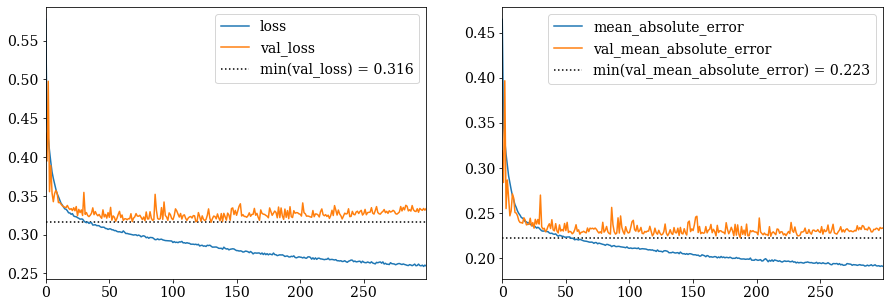

In [124]:
#trial 16+16+16 Dropout Dense 16 - using augmented (all images rotated 3 times) images
history = cnnmodel.fit(x_train, y_train,batch_size=batch_size, epochs=3*epochs,verbose=1,validation_data=(x_test, y_test))
histplot(history)

Train on 19836 samples, validate on 620 samples
Epoch 1/300
19836/19836 [==============================] - 5s 271us/sample - loss: 0.6260 - mean_absolute_error: 0.5201 - val_loss: 0.4023 - val_mean_absolute_error: 0.2915
Epoch 2/300
19836/19836 [==============================] - 4s 224us/sample - loss: 0.4344 - mean_absolute_error: 0.3353 - val_loss: 0.3775 - val_mean_absolute_error: 0.2908
Epoch 3/300
19836/19836 [==============================] - 5s 235us/sample - loss: 0.4098 - mean_absolute_error: 0.3156 - val_loss: 0.4126 - val_mean_absolute_error: 0.3390
Epoch 4/300
19836/19836 [==============================] - 4s 223us/sample - loss: 0.4014 - mean_absolute_error: 0.3071 - val_loss: 0.3677 - val_mean_absolute_error: 0.2646
Epoch 5/300
19836/19836 [==============================] - 4s 213us/sample - loss: 0.3942 - mean_absolute_error: 0.3022 - val_loss: 0.3646 - val_mean_absolute_error: 0.2632
Epoch 6/300
19836/19836 [==============================] - 5s 243us/sample - loss: 0.38

Epoch 48/300
19836/19836 [==============================] - 4s 190us/sample - loss: 0.3161 - mean_absolute_error: 0.2303 - val_loss: 0.3266 - val_mean_absolute_error: 0.2349
Epoch 49/300
19836/19836 [==============================] - 4s 201us/sample - loss: 0.3152 - mean_absolute_error: 0.2300 - val_loss: 0.3233 - val_mean_absolute_error: 0.2303
Epoch 50/300
19836/19836 [==============================] - 4s 188us/sample - loss: 0.3157 - mean_absolute_error: 0.2302 - val_loss: 0.3278 - val_mean_absolute_error: 0.2343
Epoch 51/300
19836/19836 [==============================] - 4s 201us/sample - loss: 0.3145 - mean_absolute_error: 0.2288 - val_loss: 0.3258 - val_mean_absolute_error: 0.2326
Epoch 52/300
19836/19836 [==============================] - 4s 192us/sample - loss: 0.3145 - mean_absolute_error: 0.2293 - val_loss: 0.3284 - val_mean_absolute_error: 0.2346
Epoch 53/300
19836/19836 [==============================] - 4s 218us/sample - loss: 0.3148 - mean_absolute_error: 0.2292 - val_los

Epoch 142/300
19836/19836 [==============================] - 5s 233us/sample - loss: 0.2995 - mean_absolute_error: 0.2173 - val_loss: 0.3242 - val_mean_absolute_error: 0.2306
Epoch 143/300
19836/19836 [==============================] - 5s 236us/sample - loss: 0.2994 - mean_absolute_error: 0.2175 - val_loss: 0.3221 - val_mean_absolute_error: 0.2302
Epoch 144/300
19836/19836 [==============================] - 4s 218us/sample - loss: 0.2993 - mean_absolute_error: 0.2169 - val_loss: 0.3186 - val_mean_absolute_error: 0.2264
Epoch 145/300
19836/19836 [==============================] - 4s 196us/sample - loss: 0.2979 - mean_absolute_error: 0.2168 - val_loss: 0.3181 - val_mean_absolute_error: 0.2251
Epoch 146/300
19836/19836 [==============================] - 4s 191us/sample - loss: 0.2989 - mean_absolute_error: 0.2172 - val_loss: 0.3226 - val_mean_absolute_error: 0.2302
Epoch 147/300
19836/19836 [==============================] - 4s 198us/sample - loss: 0.2991 - mean_absolute_error: 0.2173 - v

Epoch 189/300
19836/19836 [==============================] - 4s 206us/sample - loss: 0.2946 - mean_absolute_error: 0.2138 - val_loss: 0.3188 - val_mean_absolute_error: 0.2248
Epoch 190/300
19836/19836 [==============================] - 4s 200us/sample - loss: 0.2933 - mean_absolute_error: 0.2127 - val_loss: 0.3201 - val_mean_absolute_error: 0.2277
Epoch 191/300
19836/19836 [==============================] - 4s 201us/sample - loss: 0.2942 - mean_absolute_error: 0.2138 - val_loss: 0.3198 - val_mean_absolute_error: 0.2261
Epoch 192/300
19836/19836 [==============================] - 4s 195us/sample - loss: 0.2939 - mean_absolute_error: 0.2128 - val_loss: 0.3197 - val_mean_absolute_error: 0.2262
Epoch 193/300
19836/19836 [==============================] - 4s 198us/sample - loss: 0.2944 - mean_absolute_error: 0.2138 - val_loss: 0.3171 - val_mean_absolute_error: 0.2236
Epoch 194/300
19836/19836 [==============================] - 4s 192us/sample - loss: 0.2931 - mean_absolute_error: 0.2134 - v

Epoch 236/300
19836/19836 [==============================] - 5s 235us/sample - loss: 0.2914 - mean_absolute_error: 0.2116 - val_loss: 0.3209 - val_mean_absolute_error: 0.2260
Epoch 237/300
19836/19836 [==============================] - 4s 226us/sample - loss: 0.2914 - mean_absolute_error: 0.2108 - val_loss: 0.3235 - val_mean_absolute_error: 0.2296
Epoch 238/300
19836/19836 [==============================] - 4s 212us/sample - loss: 0.2904 - mean_absolute_error: 0.2109 - val_loss: 0.3198 - val_mean_absolute_error: 0.2266
Epoch 239/300
19836/19836 [==============================] - 5s 228us/sample - loss: 0.2921 - mean_absolute_error: 0.2114 - val_loss: 0.3193 - val_mean_absolute_error: 0.2242
Epoch 240/300
19836/19836 [==============================] - 5s 245us/sample - loss: 0.2899 - mean_absolute_error: 0.2106 - val_loss: 0.3208 - val_mean_absolute_error: 0.2259
Epoch 241/300
19836/19836 [==============================] - 5s 275us/sample - loss: 0.2914 - mean_absolute_error: 0.2114 - v

Epoch 283/300
19836/19836 [==============================] - 6s 293us/sample - loss: 0.2873 - mean_absolute_error: 0.2084 - val_loss: 0.3242 - val_mean_absolute_error: 0.2275
Epoch 284/300
19836/19836 [==============================] - 6s 318us/sample - loss: 0.2878 - mean_absolute_error: 0.2092 - val_loss: 0.3239 - val_mean_absolute_error: 0.2268
Epoch 285/300
19836/19836 [==============================] - 6s 309us/sample - loss: 0.2884 - mean_absolute_error: 0.2092 - val_loss: 0.3256 - val_mean_absolute_error: 0.2297
Epoch 286/300
19836/19836 [==============================] - 6s 298us/sample - loss: 0.2879 - mean_absolute_error: 0.2085 - val_loss: 0.3235 - val_mean_absolute_error: 0.2247
Epoch 287/300
19836/19836 [==============================] - 5s 233us/sample - loss: 0.2875 - mean_absolute_error: 0.2089 - val_loss: 0.3217 - val_mean_absolute_error: 0.2247
Epoch 288/300
19836/19836 [==============================] - 4s 212us/sample - loss: 0.2881 - mean_absolute_error: 0.2096 - v

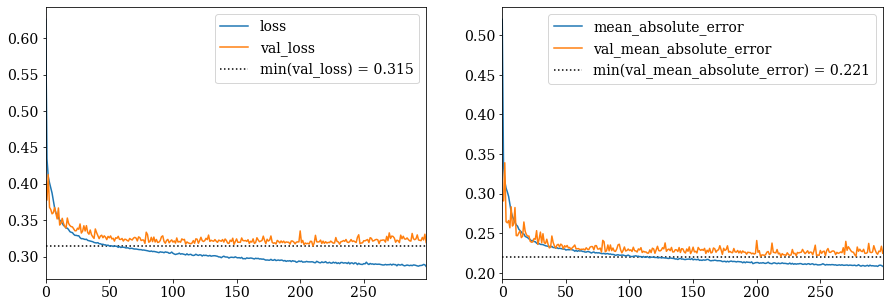

In [79]:
#trial 4+8+16 Dropout Dense 16 - using augmented (all images rotated 3 times) images
history = cnnmodel.fit(x_train, y_train,batch_size=batch_size, epochs=3*epochs,verbose=1,validation_data=(x_test, y_test))
histplot(history)

Train on 19836 samples, validate on 620 samples
Epoch 1/300
19836/19836 [==============================] - 4s 198us/sample - loss: 0.7460 - mean_absolute_error: 0.5038 - val_loss: 0.4371 - val_mean_absolute_error: 0.2698
Epoch 2/300
19836/19836 [==============================] - 3s 161us/sample - loss: 0.4578 - mean_absolute_error: 0.3217 - val_loss: 0.3858 - val_mean_absolute_error: 0.2574
Epoch 3/300
19836/19836 [==============================] - 3s 158us/sample - loss: 0.4071 - mean_absolute_error: 0.2935 - val_loss: 0.3678 - val_mean_absolute_error: 0.2626
Epoch 4/300
19836/19836 [==============================] - 3s 163us/sample - loss: 0.3804 - mean_absolute_error: 0.2783 - val_loss: 0.3694 - val_mean_absolute_error: 0.2718
Epoch 5/300
19836/19836 [==============================] - 3s 160us/sample - loss: 0.3690 - mean_absolute_error: 0.2694 - val_loss: 0.3523 - val_mean_absolute_error: 0.2483
Epoch 6/300
19836/19836 [==============================] - 3s 162us/sample - loss: 0.36

Epoch 48/300
19836/19836 [==============================] - 3s 143us/sample - loss: 0.3069 - mean_absolute_error: 0.2212 - val_loss: 0.3387 - val_mean_absolute_error: 0.2431
Epoch 49/300
19836/19836 [==============================] - 3s 145us/sample - loss: 0.3067 - mean_absolute_error: 0.2215 - val_loss: 0.3452 - val_mean_absolute_error: 0.2521
Epoch 50/300
19836/19836 [==============================] - 3s 142us/sample - loss: 0.3065 - mean_absolute_error: 0.2214 - val_loss: 0.3475 - val_mean_absolute_error: 0.2521
Epoch 51/300
19836/19836 [==============================] - 3s 143us/sample - loss: 0.3062 - mean_absolute_error: 0.2211 - val_loss: 0.3452 - val_mean_absolute_error: 0.2479
Epoch 52/300
19836/19836 [==============================] - 3s 141us/sample - loss: 0.3060 - mean_absolute_error: 0.2208 - val_loss: 0.3368 - val_mean_absolute_error: 0.2401
Epoch 53/300
19836/19836 [==============================] - 3s 147us/sample - loss: 0.3055 - mean_absolute_error: 0.2207 - val_los

Epoch 142/300
19836/19836 [==============================] - 3s 152us/sample - loss: 0.2847 - mean_absolute_error: 0.2053 - val_loss: 0.3461 - val_mean_absolute_error: 0.2410
Epoch 143/300
19836/19836 [==============================] - 3s 152us/sample - loss: 0.2856 - mean_absolute_error: 0.2055 - val_loss: 0.3487 - val_mean_absolute_error: 0.2473
Epoch 144/300
19836/19836 [==============================] - 3s 153us/sample - loss: 0.2850 - mean_absolute_error: 0.2046 - val_loss: 0.3415 - val_mean_absolute_error: 0.2381
Epoch 145/300
19836/19836 [==============================] - 3s 152us/sample - loss: 0.2852 - mean_absolute_error: 0.2053 - val_loss: 0.3474 - val_mean_absolute_error: 0.2439
Epoch 146/300
19836/19836 [==============================] - 3s 156us/sample - loss: 0.2853 - mean_absolute_error: 0.2055 - val_loss: 0.3537 - val_mean_absolute_error: 0.2491
Epoch 147/300
19836/19836 [==============================] - 3s 153us/sample - loss: 0.2844 - mean_absolute_error: 0.2048 - v

Epoch 189/300
19836/19836 [==============================] - 3s 135us/sample - loss: 0.2779 - mean_absolute_error: 0.2008 - val_loss: 0.3508 - val_mean_absolute_error: 0.2447
Epoch 190/300
19836/19836 [==============================] - 3s 132us/sample - loss: 0.2770 - mean_absolute_error: 0.2005 - val_loss: 0.3432 - val_mean_absolute_error: 0.2368
Epoch 191/300
19836/19836 [==============================] - 3s 131us/sample - loss: 0.2770 - mean_absolute_error: 0.2000 - val_loss: 0.3438 - val_mean_absolute_error: 0.2388
Epoch 192/300
19836/19836 [==============================] - 3s 131us/sample - loss: 0.2773 - mean_absolute_error: 0.2010 - val_loss: 0.3461 - val_mean_absolute_error: 0.2400
Epoch 193/300
19836/19836 [==============================] - 3s 131us/sample - loss: 0.2758 - mean_absolute_error: 0.1999 - val_loss: 0.3495 - val_mean_absolute_error: 0.2449
Epoch 194/300
19836/19836 [==============================] - 3s 128us/sample - loss: 0.2768 - mean_absolute_error: 0.1998 - v

Epoch 236/300
19836/19836 [==============================] - 3s 135us/sample - loss: 0.2704 - mean_absolute_error: 0.1963 - val_loss: 0.3422 - val_mean_absolute_error: 0.2392
Epoch 237/300
19836/19836 [==============================] - 3s 129us/sample - loss: 0.2708 - mean_absolute_error: 0.1964 - val_loss: 0.3456 - val_mean_absolute_error: 0.2415
Epoch 238/300
19836/19836 [==============================] - 3s 135us/sample - loss: 0.2708 - mean_absolute_error: 0.1964 - val_loss: 0.3467 - val_mean_absolute_error: 0.2407
Epoch 239/300
19836/19836 [==============================] - 3s 131us/sample - loss: 0.2708 - mean_absolute_error: 0.1961 - val_loss: 0.3474 - val_mean_absolute_error: 0.2423
Epoch 240/300
19836/19836 [==============================] - 3s 131us/sample - loss: 0.2698 - mean_absolute_error: 0.1958 - val_loss: 0.3483 - val_mean_absolute_error: 0.2435
Epoch 241/300
19836/19836 [==============================] - 3s 134us/sample - loss: 0.2709 - mean_absolute_error: 0.1966 - v

Epoch 283/300
19836/19836 [==============================] - 3s 128us/sample - loss: 0.2647 - mean_absolute_error: 0.1923 - val_loss: 0.3508 - val_mean_absolute_error: 0.2464
Epoch 284/300
19836/19836 [==============================] - 3s 127us/sample - loss: 0.2644 - mean_absolute_error: 0.1923 - val_loss: 0.3567 - val_mean_absolute_error: 0.2522
Epoch 285/300
19836/19836 [==============================] - 3s 133us/sample - loss: 0.2648 - mean_absolute_error: 0.1929 - val_loss: 0.3497 - val_mean_absolute_error: 0.2462
Epoch 286/300
19836/19836 [==============================] - 3s 128us/sample - loss: 0.2656 - mean_absolute_error: 0.1931 - val_loss: 0.3502 - val_mean_absolute_error: 0.2480
Epoch 287/300
19836/19836 [==============================] - 3s 130us/sample - loss: 0.2644 - mean_absolute_error: 0.1921 - val_loss: 0.3458 - val_mean_absolute_error: 0.2430
Epoch 288/300
19836/19836 [==============================] - 3s 127us/sample - loss: 0.2642 - mean_absolute_error: 0.1923 - v

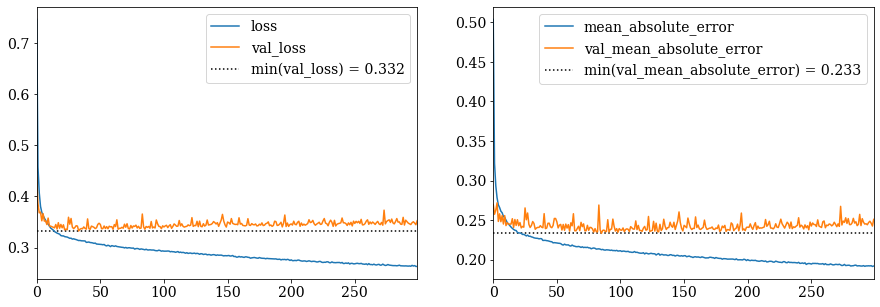

In [132]:
#trial 16+16(reg l2)+16(reg l2) Dropout Dense 16 - using augmented (all images rotated 3 times) images
history = cnnmodel.fit(x_train, y_train,batch_size=batch_size, epochs=3*epochs,verbose=1,validation_data=(x_test, y_test))
histplot(history)

In [42]:
#Where Test Loss is the RMSE
score = cnnmodel.evaluate(x_val, y_val, verbose=2)
print('Test loss:', score[0])
print('Test Mean absolute error:', score[1])

620/620 - 0s - loss: 0.3567 - mean_absolute_error: 0.2568
Test loss: 0.35666839345808954
Test Mean absolute error: 0.25684845


In [43]:
pred = cnnmodel.predict(x_val)
true = y_val
print(pred.shape)
print(x_val.shape)

(620, 1)
(620, 32, 32, 1)


In [44]:
xbins = np.arange(0,4.5,0.25)
print(np.min(xbins))

0.0


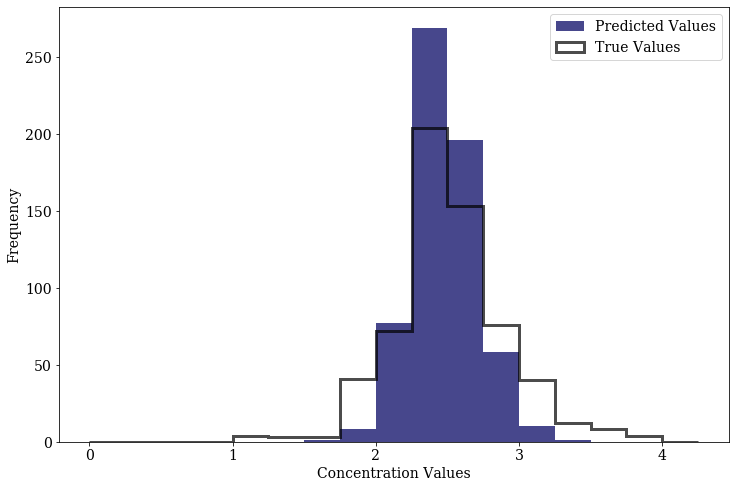

In [45]:
#Plotting histogram of predicted values against true values 
#Creating bin widths so that predicitons and true values can be compared

xbins = np.arange(0,4.5,0.25)  #CONC
#xbins = np.arange(-0.1, 0.5, 0.05) #ASYM

#printing any predictions outside range of true values
for i in pred:
    if i < np.min(xbins) or i > np.max(xbins):
        print('Prediction of concentration outside range plotted:', i)

plt.hist(pred, color = 'midnightblue', alpha = 0.8, label = 'Predicted Values', bins = (xbins))
plt.xlabel('Concentration Values')
#plt.xlabel('Asymmetry Values')
plt.ylabel('Frequency')
plt.hist(true, color= 'k', alpha = 0.7, label = 'True Values', bins=(xbins), histtype = 'step', linewidth = 3)
plt.legend()
plt.show()
#plt.savefig('/home/ppxct2/Documents/CANDELS/hist_CONC_predictions.png')

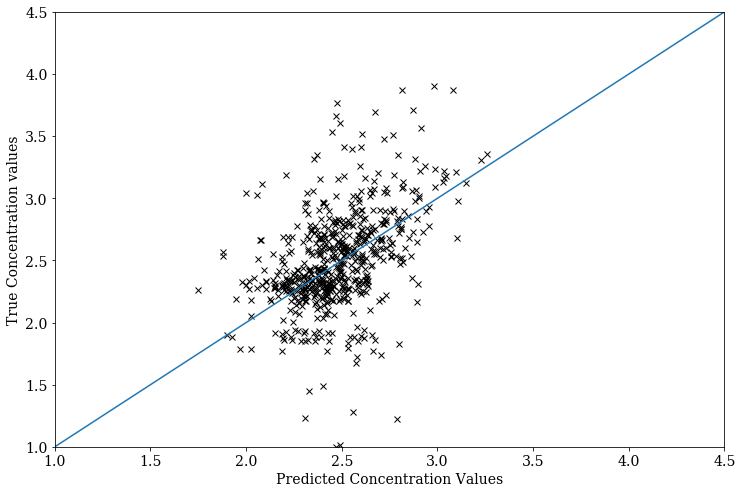

In [46]:
#Plot for concentrations 
plt.plot(pred, true, linestyle = 'none', marker = 'x', color = 'k', alpha = 1)
plt.plot((1, 4.5), (1,4.5))
plt.xlabel('Predicted Concentration Values')
plt.ylabel('True Concentration values')
plt.xlim(1, 4.5)
plt.ylim(1, 4.5)
plt.show()

## Saving Network so it can be reloaded

In [82]:
#Serialize model to JSON
cnnmodel_json = cnnmodel.to_json()
with open("cnnmodel.json","w") as json_file:
    json_file.write(cnnmodel_json)
#serialize weights to HDF5 
cnnmodel.save_weights("cnnmodel.h5")
print('saved model to disk')

saved model to disk


## Predicting concentrations of reconstructed images from VAE

In [75]:
#Reconstructed images 
VAE_images = np.load('/home/ppxct2/Documents/CANDELS/VAE_imgs.npy')

In [76]:
#Network predicitons of Conc
VAE_vals = cnnmodel.predict(VAE_images)

In [77]:
VAE_vals[0:10]

array([[2.4761727],
       [2.4675343],
       [2.2746408],
       [2.5140476],
       [1.7404636],
       [2.5836666],
       [2.454935 ],
       [2.330773 ],
       [2.370932 ],
       [2.3593729]], dtype=float32)

In [78]:
print(y_test[0:10])

[2.421 2.267 2.293 2.294 2.195 2.522 2.336 1.934 1.866 2.964]


Text(0, 0.5, 'VAE Concentrations')

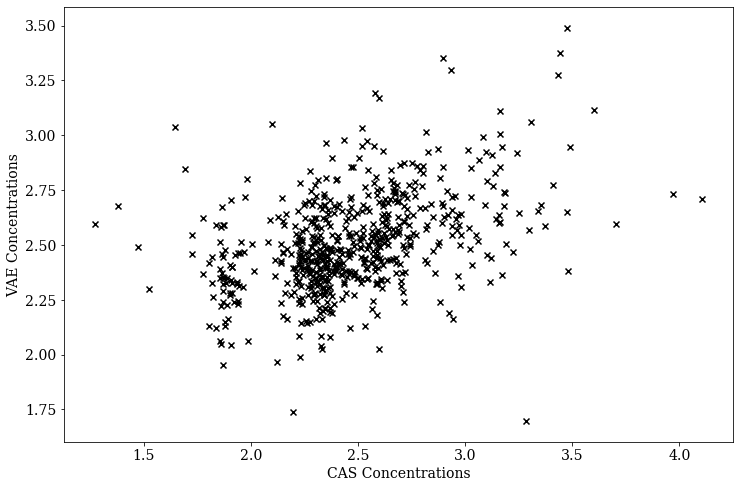

In [79]:
# CAS conc vs VAE conc
plt.scatter(y_test,VAE_vals, marker='x', c='k')
plt.xlabel('CAS Concentrations')
plt.ylabel('VAE Concentrations')

In [80]:
resid =y_test-VAE_vals
print(len(resid))

620


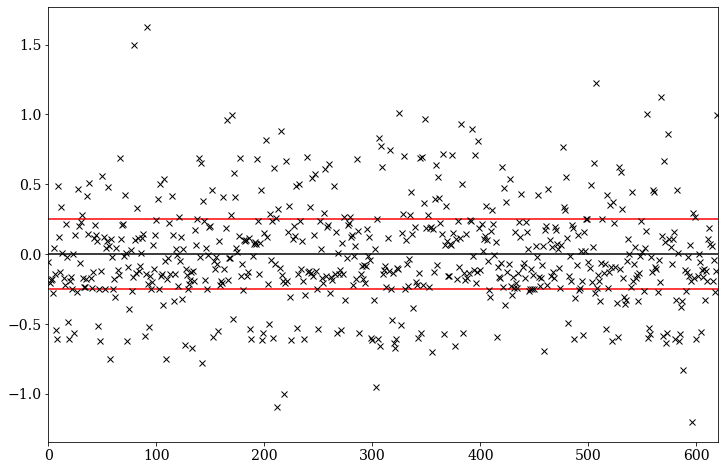

In [81]:
#PLot of residuals 
plt.plot(resid[0], linestyle='none',marker='x',c='k')
plt.hlines(0,0,620)
plt.xlim(0,620)
plt.hlines(0.25,0,620,color='r')
plt.hlines(-0.25,0,620,color='r')
plt.show()